In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style='whitegrid',context='talk')

In [2]:
degs = pd.read_csv("./STAR_HTseq_out/Neural_diff_DEGs_all_TPM.csv")
degs.head()

,gene_id,gene_name,2D0,2D10,2D20R,2D10N,2D25,2D5,2D5N,8D0,8D10,8D10N,8D20R,8D25,8D5,8D5N
0,ENSG00000000005,TNMD,3.48,0.07,0.19,0.18,0.19,0.07,0.00,5.68,0.00,0.12,0.00,0.09,0.00,0.22
1,ENSG00000001630,CYP51A1,171.46,25.27,96.43,30.76,95.77,25.50,26.13,133.97,31.95,27.77,74.01,69.51,22.55,30.49
2,ENSG00000002016,RAD52,10.82,13.74,18.52,17.82,13.61,11.36,17.30,8.18,11.46,16.74,11.39,14.99,14.50,14.35
3,ENSG00000002549,LAP3,32.49,28.60,23.15,14.05,26.67,29.67,17.88,26.12,35.76,15.42,19.03,19.06,30.29,18.01
4,ENSG00000002586,CD99,16.79,95.37,115.89,79.92,88.67,27.40,40.73,27.23,249.24,66.28,77.79,80.58,54.53,32.89


In [3]:
order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']

In [4]:
degs_tpm = degs[order]
degs_tpm.head()

,2D0,8D0,2D5N,8D5N,2D10N,8D10N,2D20R,8D20R,2D25,8D25,2D5,8D5,2D10,8D10
0,3.48,5.68,0.00,0.22,0.18,0.12,0.19,0.00,0.19,0.09,0.07,0.00,0.07,0.00
1,171.46,133.97,26.13,30.49,30.76,27.77,96.43,74.01,95.77,69.51,25.50,22.55,25.27,31.95
2,10.82,8.18,17.30,14.35,17.82,16.74,18.52,11.39,13.61,14.99,11.36,14.50,13.74,11.46
3,32.49,26.12,17.88,18.01,14.05,15.42,23.15,19.03,26.67,19.06,29.67,30.29,28.60,35.76
4,16.79,27.23,40.73,32.89,79.92,66.28,115.89,77.79,88.67,80.58,27.40,54.53,95.37,249.24


## Kmeans clustering using scipy
Combine with **hierachical clustering** for better visualization

In [7]:
import scipy.cluster.vq as scv
import scipy.cluster.hierarchy as sch

In [6]:
degs_log = np.log2(degs_tpm+1)

In [8]:
def kmeans_clustering(data,k=10,i=100):
    
    # scale array before k-means
    w = scv.whiten(data)
    # if kmeans method used
    centroids, distortion = scv.kmeans(w, k, iter=i)
    code, dist = scv.vq(w, centroids) # code is the cluster index of orgrinal array
    # if kmeans2 method 
    #centroids2, labels = scv.kmeans2(w, k,iter = i,minit='points') # labels  is the cluster index of original array
    return code

In [118]:
code = kmeans_clustering(degs_log, k = 40, i = 800)

In [119]:
degs['Cluster'] = code

In [120]:
degs.to_csv("./DEGs_Kmeans/Neural_diff_DEGs_kmeans_40.csv",index=False)

In [121]:
degs_new = degs.set_index(['Cluster','gene_name'])

In [122]:
del degs_new['gene_id']
degs_new.head()

,,2D0,2D10,2D20R,2D10N,2D25,2D5,2D5N,8D0,8D10,8D10N,8D20R,8D25,8D5,8D5N
Cluster,gene_name,,,,,,,,,,,,,,
35,TNMD,3.48,0.07,0.19,0.18,0.19,0.07,0.00,5.68,0.00,0.12,0.00,0.09,0.00,0.22
31,CYP51A1,171.46,25.27,96.43,30.76,95.77,25.50,26.13,133.97,31.95,27.77,74.01,69.51,22.55,30.49
14,RAD52,10.82,13.74,18.52,17.82,13.61,11.36,17.30,8.18,11.46,16.74,11.39,14.99,14.50,14.35
6,LAP3,32.49,28.60,23.15,14.05,26.67,29.67,17.88,26.12,35.76,15.42,19.03,19.06,30.29,18.01
15,CD99,16.79,95.37,115.89,79.92,88.67,27.40,40.73,27.23,249.24,66.28,77.79,80.58,54.53,32.89


In [123]:
degs_new = degs_new[order]
degs_new.sort_index(inplace=True)
degs_new.head()

2D0     8D0    2D5N    8D5N   2D10N   8D10N  2D20R  \
Cluster gene_name                                                          
0       ANXA11      27.50   42.72   21.79   27.24   17.66   44.77  26.86   
        ANXA3       10.53   19.29    5.77   25.34   11.82   48.14   7.95   
        APOE       375.84  291.47  142.20  352.23  121.99  145.70   5.29   
        ASS1        20.93   35.13   35.49   69.68   14.14   25.81   6.58   
        B3GNT2      66.11   51.57   41.08   87.73   50.83   54.24  12.96   

                   8D20R   2D25  8D25     2D5     8D5    2D10    8D10  
Cluster gene_name                                                      
0       ANXA11     16.28  13.40  4.70   65.60   89.97  115.85  164.20  
        ANXA3       4.26   5.59  0.48   69.40   63.83  213.48  391.83  
        APOE        3.12   4.31  0.77  144.55  391.65  121.88  320.52  
        ASS1        4.77   9.09  2.16   44.67   62.78   45.35   22.32  
        B3GNT2     11.80  16.19  8.21  105.22  177.51   64.91  134.64

In [3]:
def scale(y, c=True, sc=True):
    '''
    This function is used for scaling data. it's the same as API to R's scale function.
    By default, this function brocasting by row(axis = 0), if you want to scale by columns(axis=1),
    you should used y.T method.
    
    y: dataframe object from pandas.
    
    If ‘scale’ is‘TRUE’ then scaling is done by dividing the (centered) columns of
   ‘x’ by their standard deviations if ‘center’ is ‘TRUE’, and the
     root mean square otherwise.  If ‘scale’ is ‘FALSE’, no scaling is done.

     The root-mean-square for a (possibly centered) column is defined
     as sqrt(sum(x^2)/(n-1)), where x is a vector of the non-missing
     values and n is the number of non-missing values.  In the case
     ‘center = TRUE’, this is the same as the standard deviation, but
     in general it is not.
    '''
    x = y.copy()

    if c:
        x -= x.mean()
    if sc and c:
        x /= x.std()
    elif sc:
        x /= np.sqrt(x.pow(2).sum().div(x.count() - 1))
    return x

In [125]:
degs_new_log = np.log2(degs_new+1)

In [126]:
my_scaled_degs = scale(degs_new_log.T).T
my_scaled_degs.head()

2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
Cluster gene_name                                                               
0       ANXA11    -0.206241  0.267527 -0.453789 -0.216388 -0.675160  0.318262   
        ANXA3     -0.408901 -0.039222 -0.757175  0.131471 -0.339531  0.539355   
        APOE       0.874298  0.743784  0.376059  0.840981  0.297717  0.388493   
        ASS1       0.037210  0.566952  0.577472  1.278951 -0.355921  0.250393   
        B3GNT2     0.412538  0.148269 -0.092609  0.714770  0.132926  0.201885   

                      2D20R     8D20R      2D25      8D25       2D5       8D5  \
Cluster gene_name                                                               
0       ANXA11    -0.231388 -0.760228 -0.962093 -1.988194  0.733542  1.078791   
        ANXA3     -0.574582 -0.922249 -0.774801 -1.751700  0.774515  0.720601   
        APOE      -1.233256 -1.451128 -1.320470 -1.886183  0.384441  0.895461   
        ASS1      -1.089977 -1.379472 -0.786486 -2.018323  0.815573  1.169958   
        B3GNT2    -1.286728 -1.380613 -1.061479 -1.736839  0.909481  1.471307   

                       2D10      8D10  
Cluster gene_name                      
0       ANXA11     1.355989  1.739371  
        ANXA3      1.503192  1.899025  
        APOE       0.297256  0.792547  
        ASS1       0.831255  0.102417  
        B3GNT2     0.393012  1.174080

In [127]:
cls = degs_new_log.index.levels[0]
cls

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64', name='Cluster')

In [128]:
for i in cls:
    
    data = degs_new_log.loc[i]
    data_stack = data.stack()
    data_stack = data_stack.reset_index()
    data_stack.columns = ['gene_name',"time","log2(TPM+1)"]
    data_stack['time2'] = data_stack.time.str.slice(1)
    data_stack['cell_line'] = 'SHhESC'+ data_stack.time.str.slice(0,1)

    data_stack.to_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv",index= False)


In [129]:
xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]

In [130]:
import glob
file = glob.glob('./DEGs_Kmeans/*_log2TPM.csv')
file

['./DEGs_Kmeans\\Neual_diff_DEGs_cluster_0_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_10_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_11_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_12_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_13_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_14_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_15_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_16_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_17_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_18_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_19_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_1_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_20_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_21_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_22_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_23_log2TPM.csv',
 './DEGs_Kmeans\\Neual_diff_DEGs_cluster_24_log2TPM.csv',
 './DEGs_Kmeans\

In [4]:
def kmeans_plot(start=0,fig_num=5):
    fig,ax = plt.subplots(fig_num,2,figsize=(12,36))
    for i in np.arange(0,fig_num):
        m = i + start
        data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
        data2 = data[['gene_name','time','log2(TPM+1)']]
        data2.set_index(['gene_name','time'],inplace=True)
        data3 = data2.unstack()
        data3.columns = data3.columns.droplevel(0)
        data3 = data3[order]
        myscale = scale(data3.T).T
    
        # hierachical clustering inside each cluster
        Z = sch.linkage(myscale,'ward')
        D = sch.dendrogram(Z, no_plot=True)
        index = D['leaves']
    
        sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[i,0])
        ax[i,0].set_xlabel("")
        ax[i,0].set_ylabel("")
    
        sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
        ax[i,1].set_xlabel("")
        ax[i,1].set_ylabel(r"$Log_2(TPM+1)$ ")
        ax[i,1].set_title("Cluster"+str(m))
        ax[i,1].legend()
        ax[i,1].spines['top'].set_visible(False)
        #ax.xaxis.set_ticks_position('bottom')
        ax[i,1].spines['right'].set_visible(False)
        #sns.despine()
    fig.tight_layout()
    fig.savefig("./DEGs_Kmeans/kmeans_cluster_"+str(start)+"-"+str(fig_num+start)+".png",dpi=300)

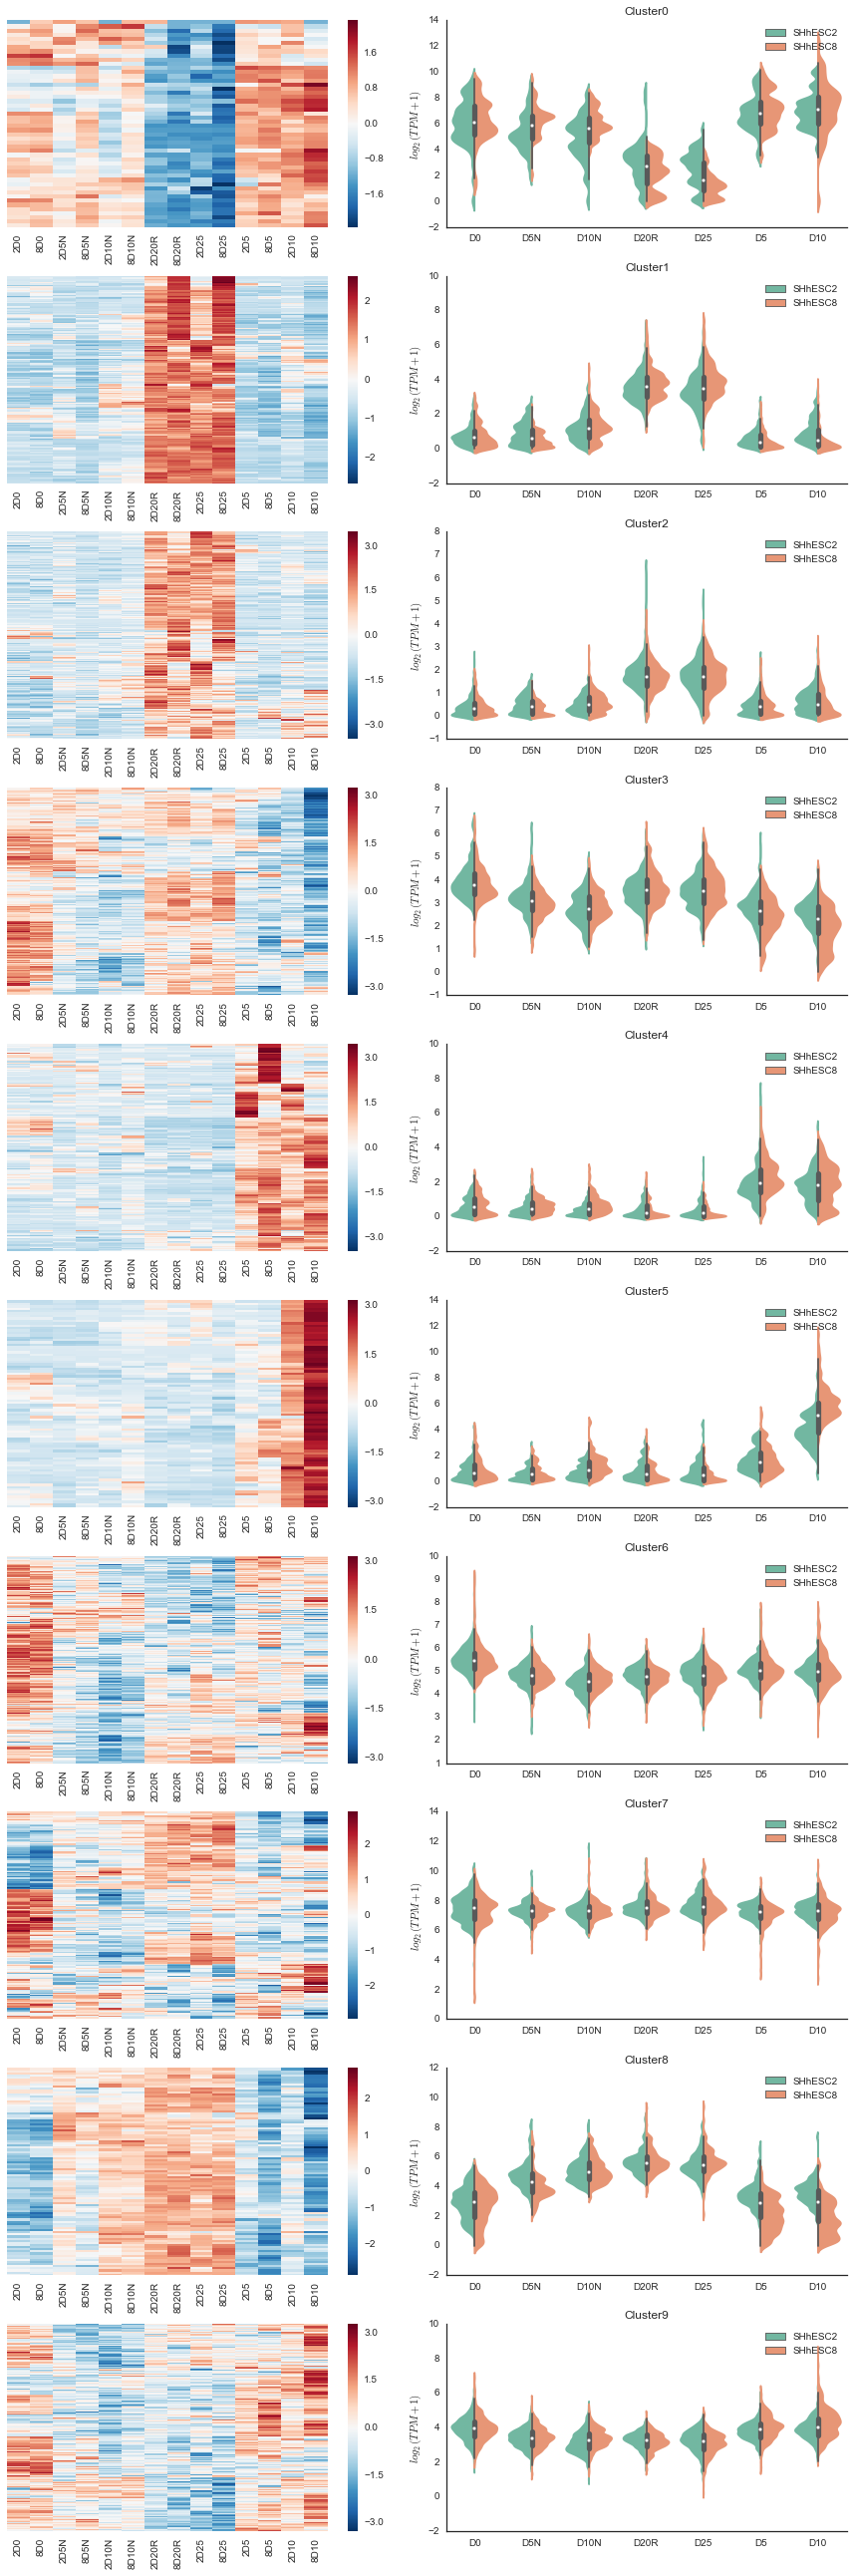

In [131]:
kmeans_plot(0,10)

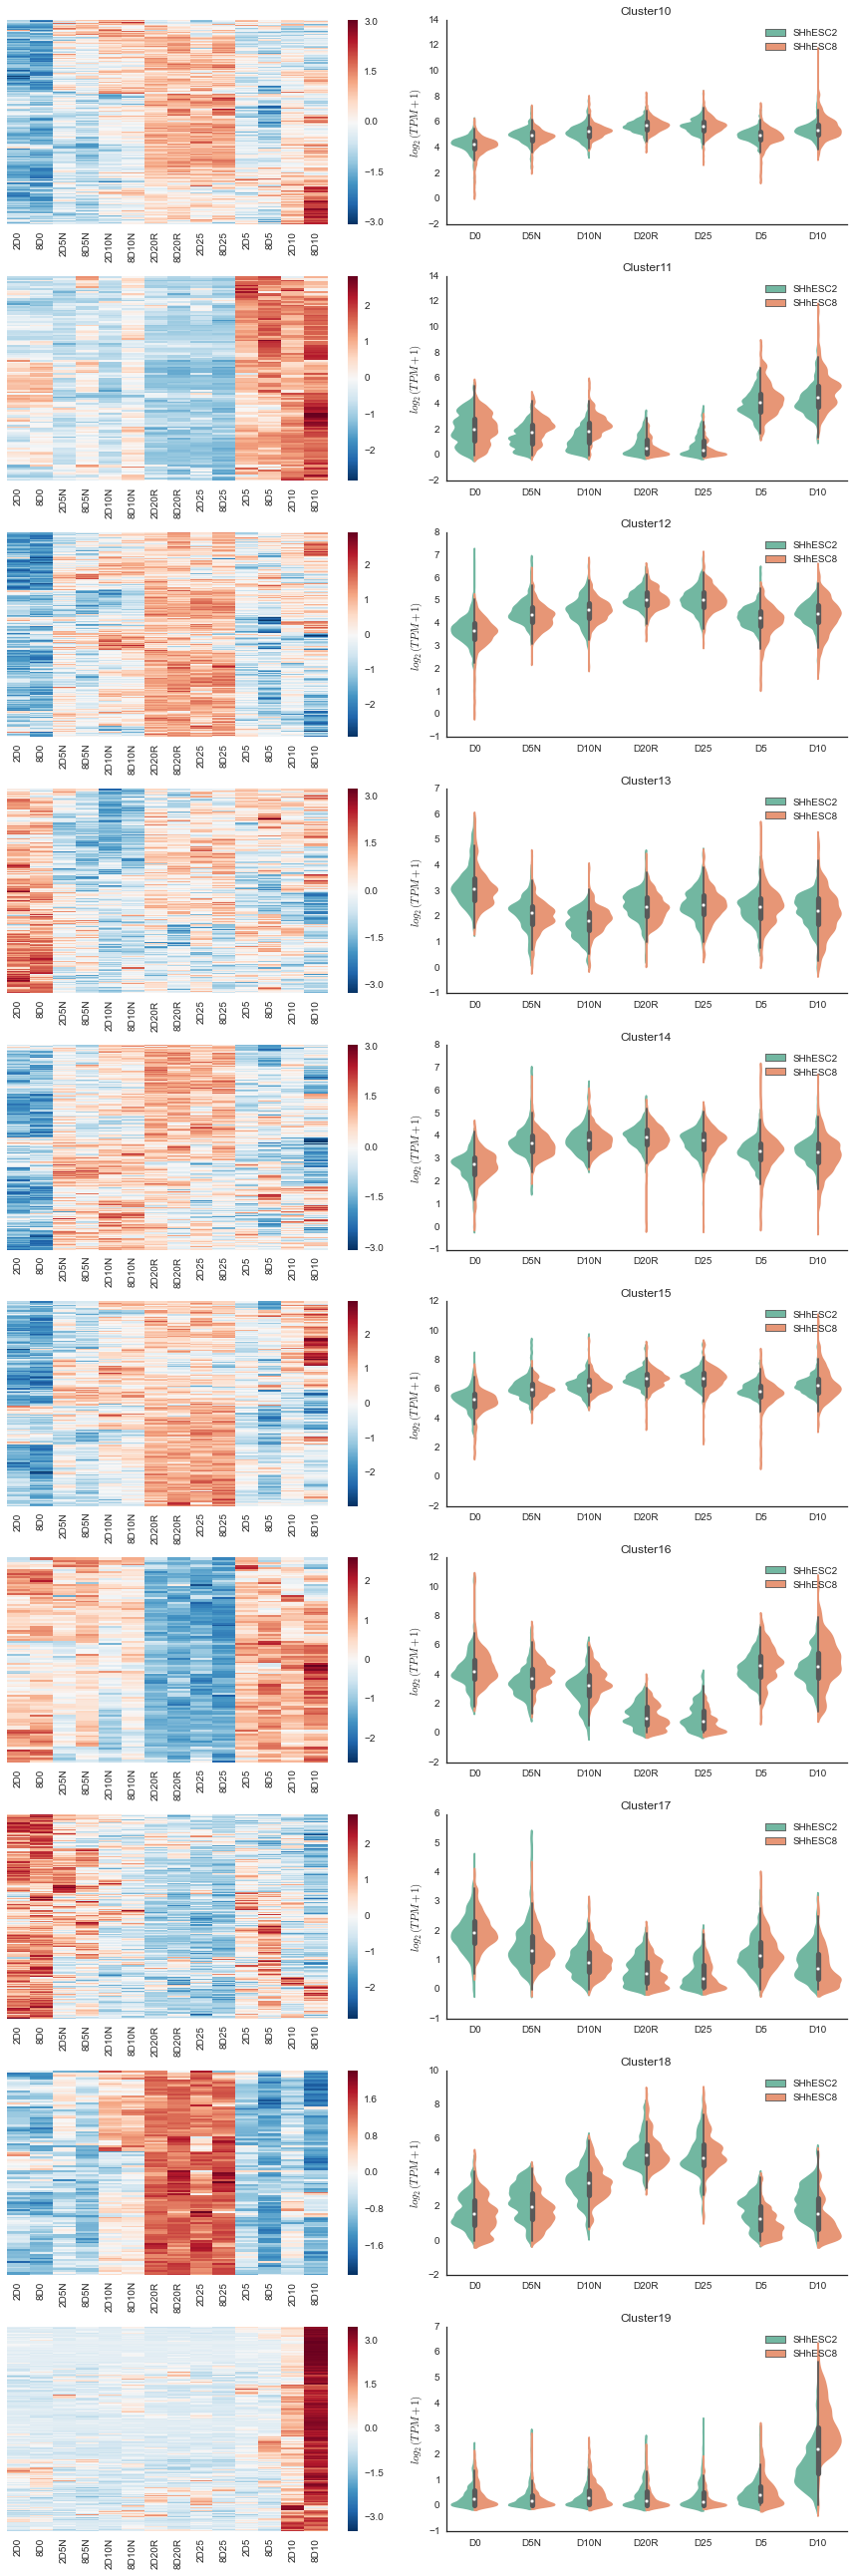

In [132]:
kmeans_plot(10,10)

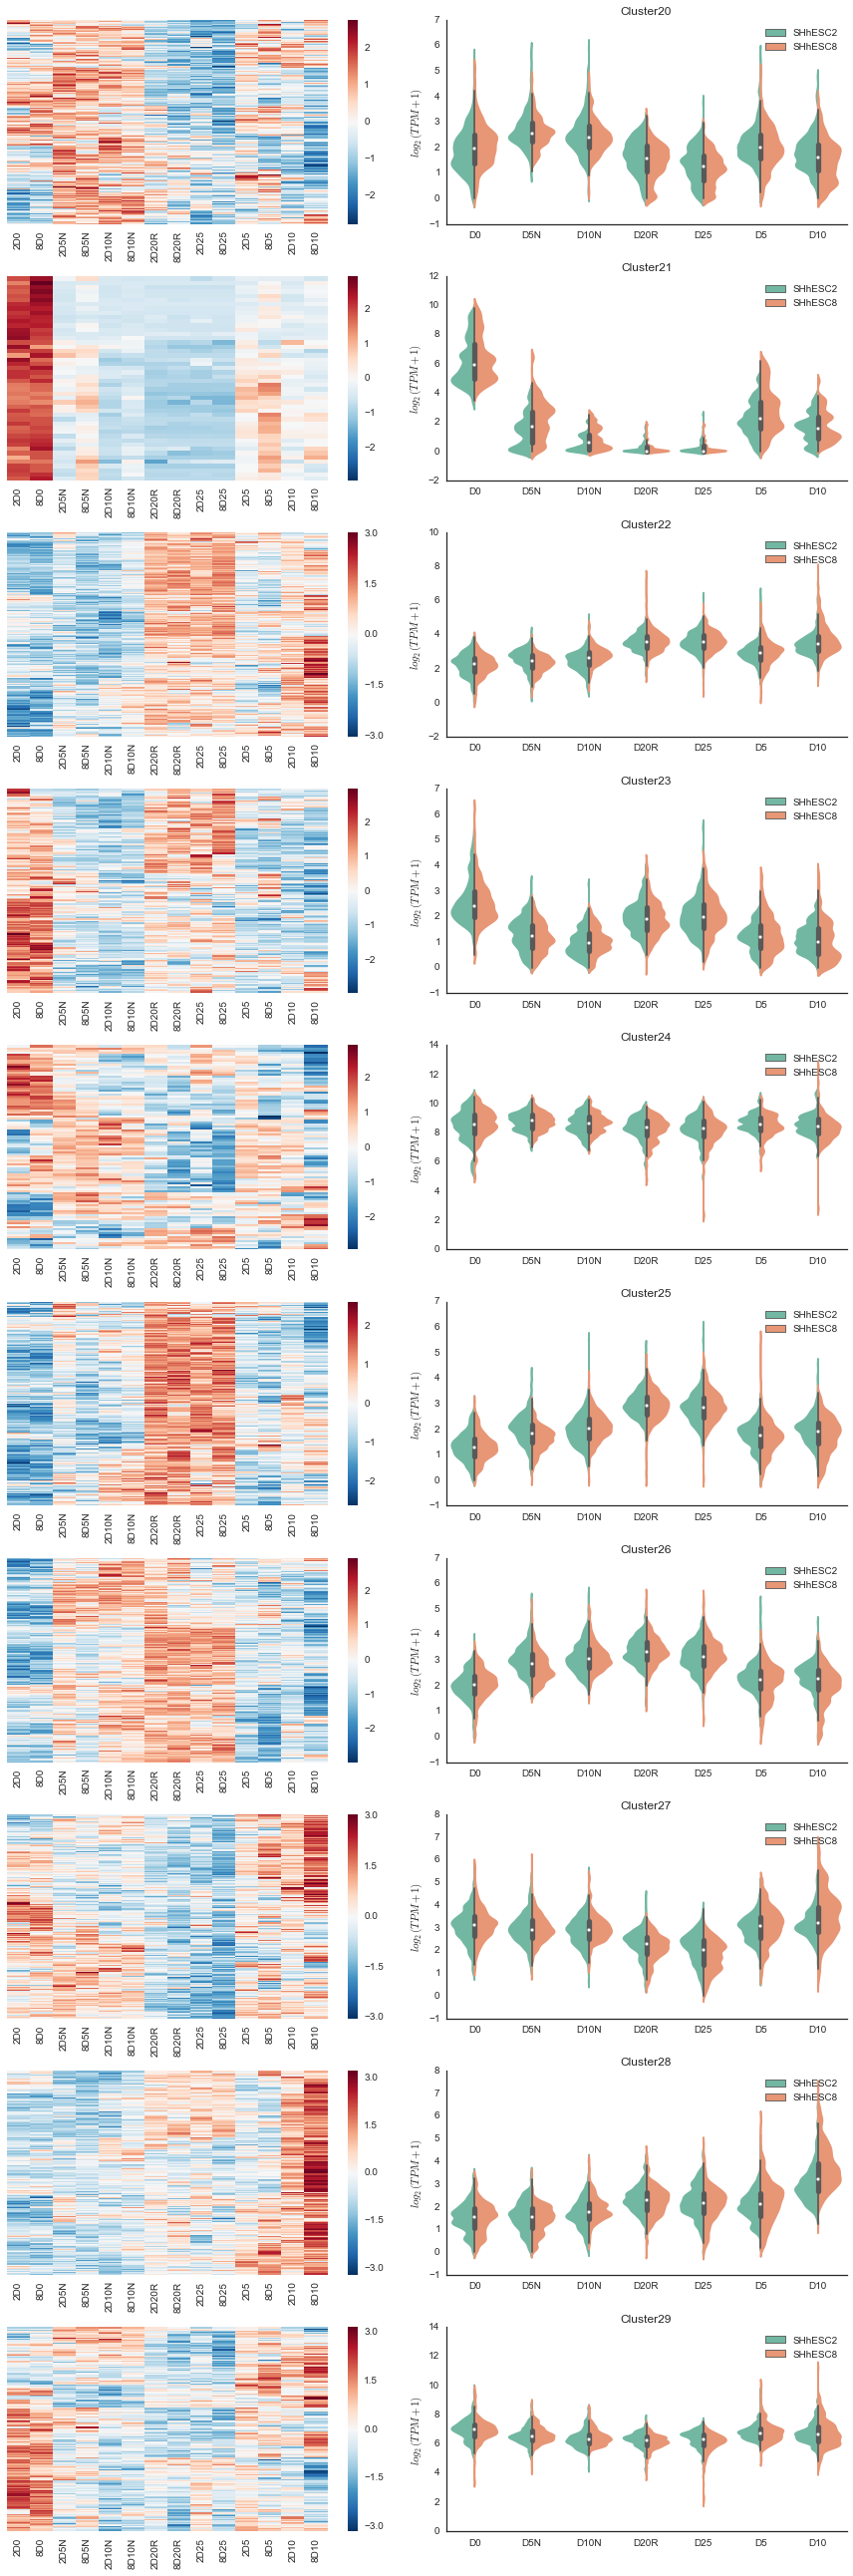

In [133]:
kmeans_plot(20,10)

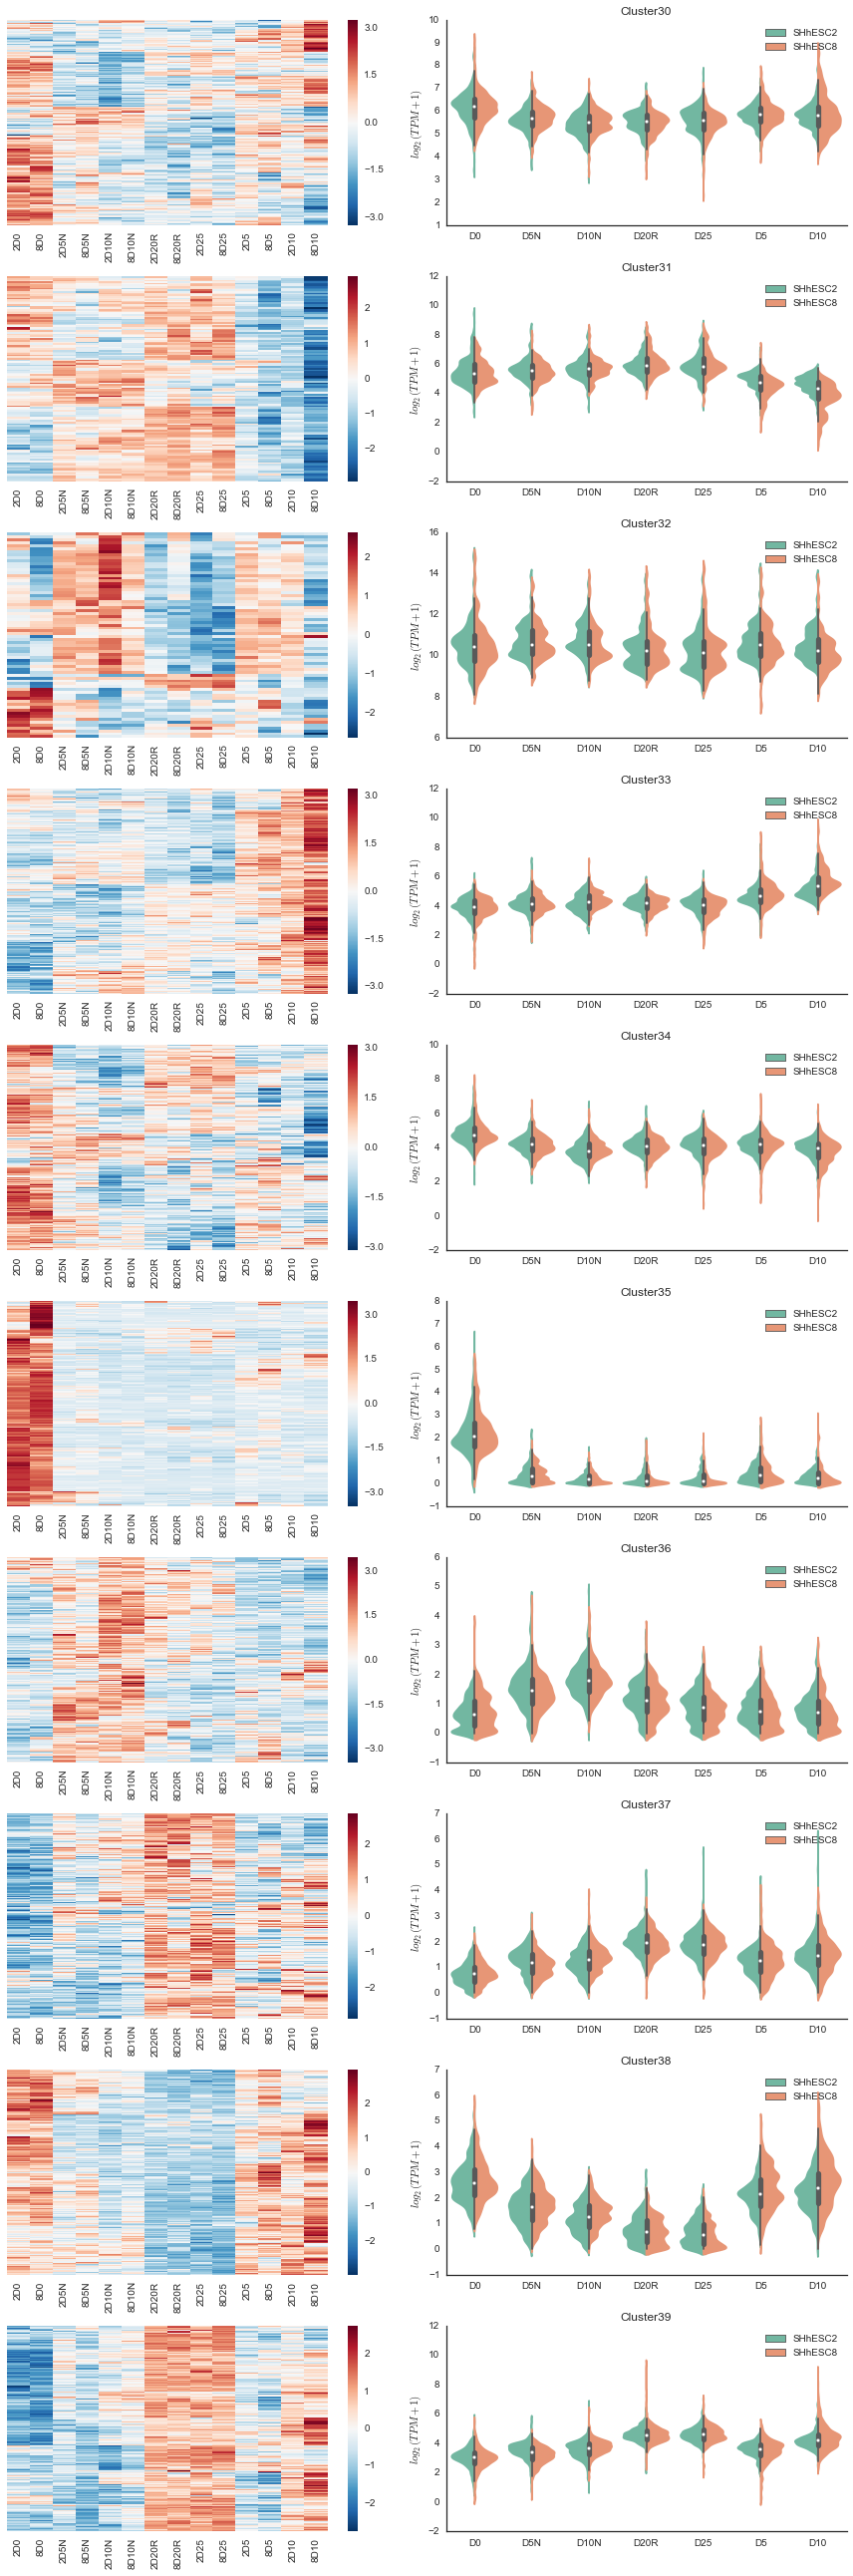

In [134]:
kmeans_plot(30,10)

In [12]:
def cluster(i = 0):
    xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]
    order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']
    fig,ax = plt.subplots(1,2,figsize=(12,4))

    data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    data2 = data[['gene_name','time','log2(TPM+1)']]
    data2.set_index(['gene_name','time'],inplace=True)
    data3 = data2.unstack()
    data3.columns = data3.columns.droplevel(0)
    data3 = data3[order]
    myscale = scale(data3.T).T
    
    
    Z = sch.linkage(myscale,'ward')
    D = sch.dendrogram(Z, no_plot=True)
    index = D['leaves']
    
    sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[0])
    ax[0].set_xlabel("")
    ax[0].set_ylabel("")
    
    sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[1])
    ax[1].set_xlabel("")
    ax[1].set_ylabel(r"$Log_2(TPM+1)$ ")
    ax[1].set_title("cluster"+str(i))
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    ax[1].spines['right'].set_visible(False)
    #sns.despine()
    fig.tight_layout()

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


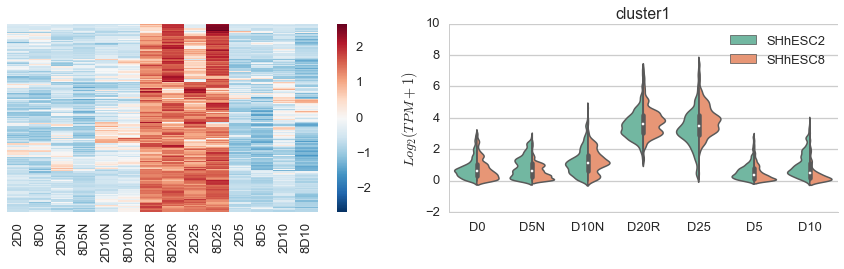

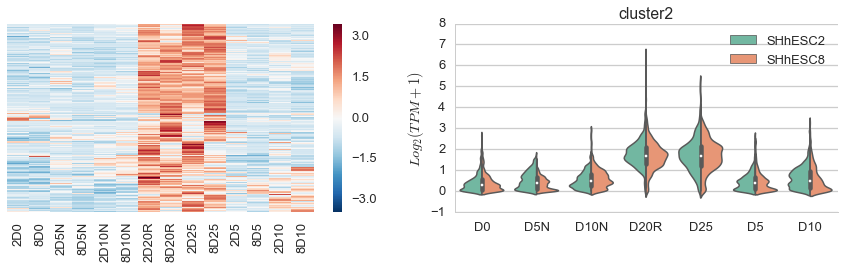

In [40]:
cluster(1)
cluster(2)

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


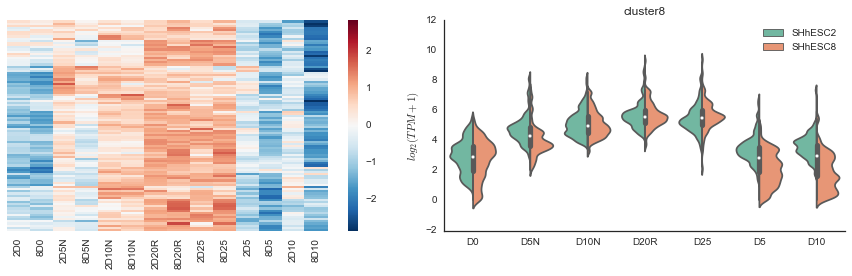

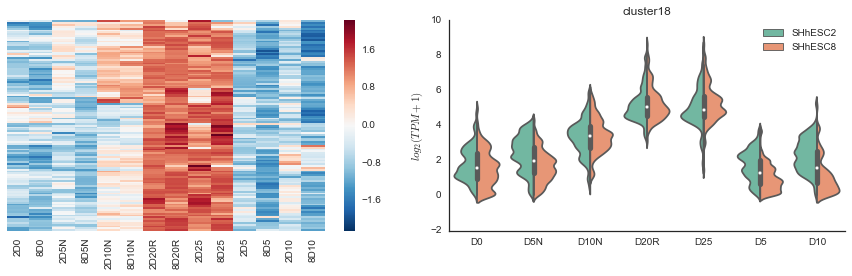

In [16]:
cluster(8)
cluster(18)

In [36]:
sns.set(palette='muted',style='white')

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


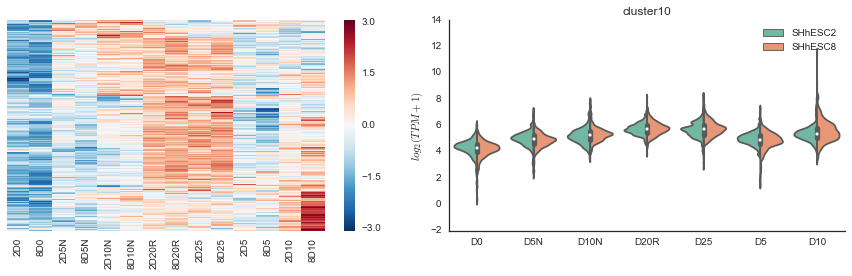

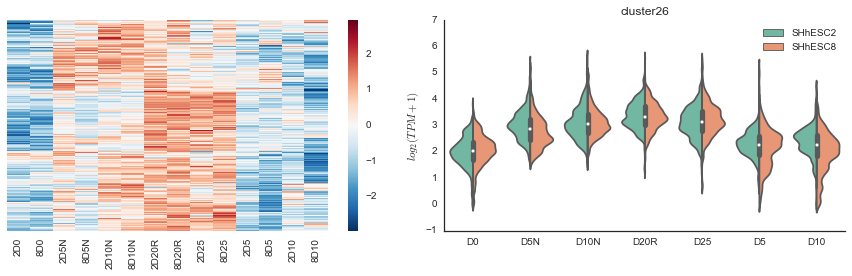

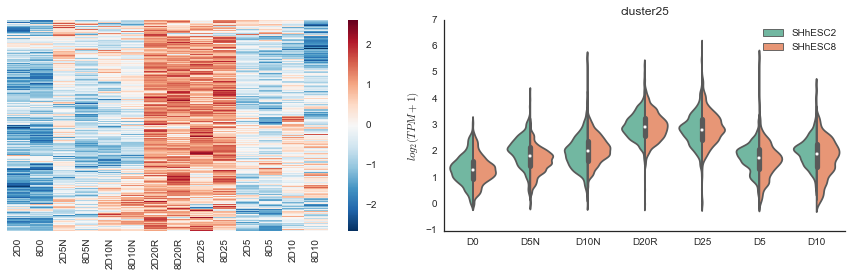

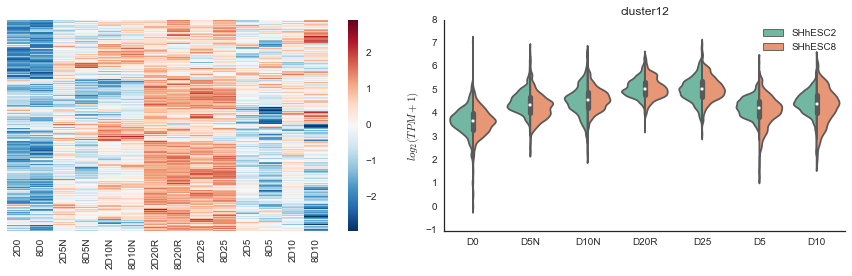

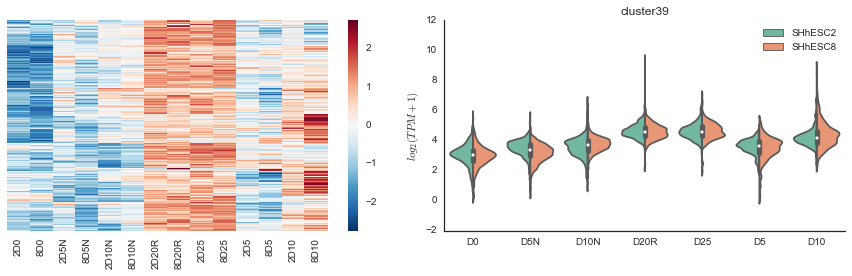

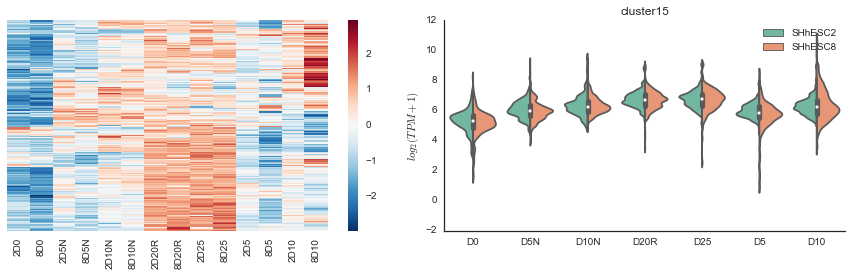

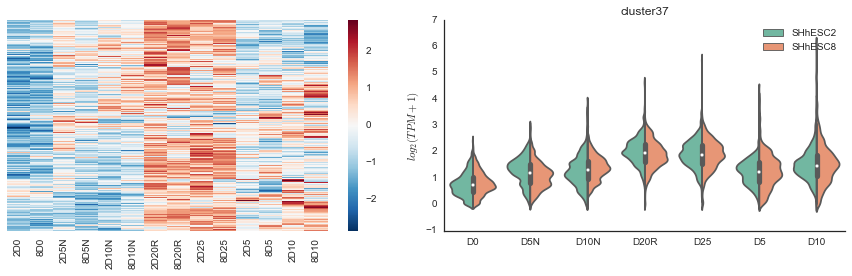

In [37]:
d = [10,26,25,12,39,15,37]
for i in d:
    cluster(i)

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


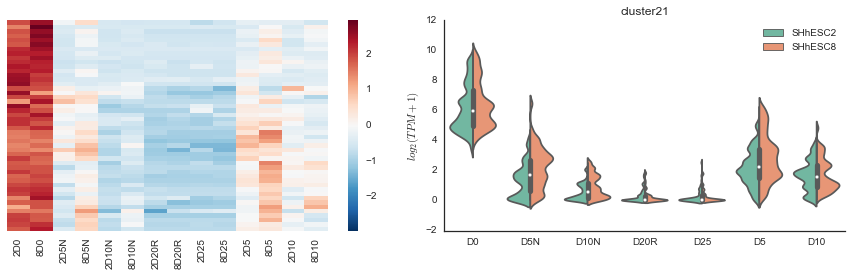

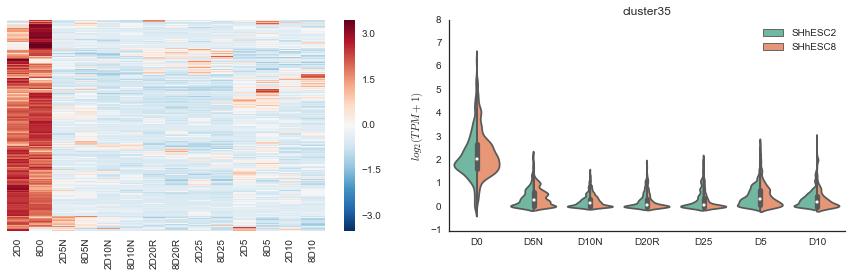

In [24]:
cluster(21)
cluster(35)

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


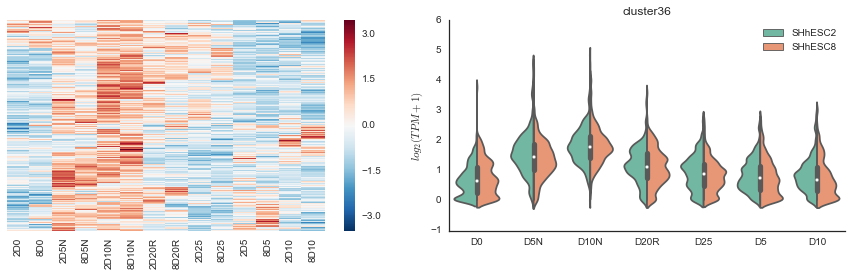

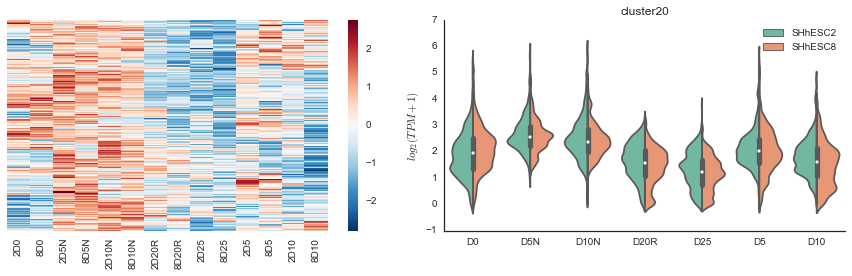

In [25]:
cluster(36)
cluster(20)

In [ ]:
def kmeans_plot(array):
    '''
    array: 1D array or list like
    '''
    fig_num = len(array)
    fig,ax = plt.subplots(fig_num,2,figsize=(12,fig_num*4))
    for i,m in enumerate(array):
        
        data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
        data2 = data[['gene_name','time','log2(TPM+1)']]
        data2.set_index(['gene_name','time'],inplace=True)
        data3 = data2.unstack()
        data3.columns = data3.columns.droplevel(0)
        data3 = data3[order]
        myscale = scale(data3.T).T
    
        # hierachical clustering inside each cluster
        Z = sch.linkage(myscale,'ward')
        D = sch.dendrogram(Z, no_plot=True)
        index = D['leaves']
    
        sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[i,0])
        ax[i,0].set_xlabel("")
        ax[i,0].set_ylabel("")
    
        sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
        ax[i,1].set_xlabel("")
        ax[i,1].set_ylabel(r"$Log_2(TPM+1)$ ")
        ax[i,1].set_title("Cluster"+str(m))
        ax[i,1].legend()
        ax[i,1].spines['top'].set_visible(False)
        #ax.xaxis.set_ticks_position('bottom')
        ax[i,1].spines['right'].set_visible(False)
        #sns.despine()
    fig.tight_layout()
    #fig.savefig("./DEGs_Kmeans/kmeans_cluster.png",dpi=300)